<a href="https://colab.research.google.com/github/Ugo5738/Convolutional-Neural-Networks-Projects/blob/main/TensorFlow_developer_project_1_(Scenery_Image_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Kaggle and Download Dataset

In [ ]:
!pip install --quiet kaggle

# upload the kaggle.json file from your local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ugochukwunwachukwu","key":"affd591e4e369e7e953e082ec357450d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# check the files in the new directory
!ls /root/.kaggle/

# Check the file permission
!ls -l ~/.kaggle/kaggle.json

# Change the file permission
# chmod 600 file - owner can read and write
# chmod 700 file - owner can read, write and execute

!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw-r--r-- 1 root root 74 Mar 15 08:58 /root/.kaggle/kaggle.json


In [ ]:
# This shows a list of 20 common kaggle dataset
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-15 08:28:36            377  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            397  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            340  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            151  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
# Using keyword to find the datset you want in CLI
!kaggle datasets list -s 'intel-image-classification'

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  
puneet6060/intel-image-classification                       Intel Image Classification                          346MB  2019-01-30 09:22:58          30262  
divyansh22/intel-berkeley-research-lab-sensor-data          Intel Berkeley Research Lab Sensor Data              33MB  2020-08-04 07:34:29            124  
tosinabase/intel-stock-prices-historical-data-intc          Intel Stock Prices Historical Data (INTC)           235KB  2021-02-25 21:09:34             29  
bwolfram/intel-cpus                                         Intel CPUs                                            2KB  2018-10-28 22:44:19            331  
bwolfram/amd-vs-intel                                       AMD 

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification 

 96% 334M/346M [00:03<00:00, 122MB/s]
100% 346M/346M [00:03<00:00, 102MB/s]


# Unzip Files and store directories as variables

In [ ]:
 import os
 import zipfile

 base_dir = '/content/intel-image-classification.zip'
 zip_ref = zipfile.ZipFile(base_dir, 'r')
 zip_ref.extractall('/tmp')
 zip_ref.close()

In [ ]:
train_dir = '/tmp/seg_train/seg_train'
validation_dir = '/tmp/seg_test/seg_test'

train_buildings_dir = os.path.join(train_dir, 'buildings')
train_forest_dir = os.path.join(train_dir, 'forest')
train_glacier_dir = os.path.join(train_dir, 'glacier')
train_mountain_dir = os.path.join(train_dir, 'mountain')
train_sea_dir = os.path.join(train_dir, 'sea')
train_street_dir = os.path.join(train_dir, 'street')

train_buildings_names = os.listdir(train_buildings_dir)
train_forest_names = os.listdir(train_forest_dir)
train_glacier_names = os.listdir(train_glacier_dir)
train_mountain_names = os.listdir(train_mountain_dir)
train_sea_names = os.listdir(train_sea_dir)
train_street_names = os.listdir(train_street_dir)

validation_buildings_dir = os.path.join(validation_dir, 'buildings')
validation_forest_dir = os.path.join(validation_dir, 'forest')
validation_glacier_dir = os.path.join(validation_dir, 'glacier')
validation_mountain_dir = os.path.join(validation_dir, 'mountain')
validation_sea_dir = os.path.join(validation_dir, 'sea')
validation_street_dir = os.path.join(validation_dir, 'street')

In [ ]:
print(f'Total number of images in train_buildings_dir is: {len(train_buildings_names)}')
print(f'Total number of images in train_forest_dir is: {len(train_forest_names)}')
print(f'Total number of images in train_glacier_dir is: {len(train_glacier_names)}')
print(f'Total number of images in train_mountain_dir is: {len(train_mountain_names)}')
print(f'Total number of images in train_sea_dir is: {len(train_sea_names)}')
print(f'Total number of images in train_street_dir is: {len(train_street_names)}')
print(f'Total number of images is: {len(train_buildings_names + train_forest_names + train_glacier_names + train_mountain_names + train_sea_names + train_street_names)}')

Total number of images in train_buildings_dir is: 2191
Total number of images in train_forest_dir is: 2271
Total number of images in train_glacier_dir is: 2404
Total number of images in train_mountain_dir is: 2512
Total number of images in train_sea_dir is: 2274
Total number of images in train_street_dir is: 2382
Total number of images is: 14034


In [ ]:
print(f'Total number of images in validation_buildings_dir is: {len(os.listdir(validation_buildings_dir))}')
print(f'Total number of images in validation_forest_dir is: {len(os.listdir(validation_forest_dir))}')
print(f'Total number of images in validation_glacier_dir is: {len(os.listdir(validation_glacier_dir))}')
print(f'Total number of images in validation_mountain_dir is: {len(os.listdir(validation_mountain_dir))}')
print(f'Total number of images in validation_sea_dir is: {len(os.listdir(validation_sea_dir))}')
print(f'Total number of images in validation_street_dir is: {len(os.listdir(validation_street_dir))}')
print(f'Total number of images is: {len(os.listdir(validation_buildings_dir) + os.listdir(validation_forest_dir) + os.listdir(validation_glacier_dir) + os.listdir(validation_mountain_dir) + os.listdir(validation_sea_dir) + os.listdir(validation_street_dir))}')

Total number of images in validation_buildings_dir is: 437
Total number of images in validation_forest_dir is: 474
Total number of images in validation_glacier_dir is: 553
Total number of images in validation_mountain_dir is: 525
Total number of images in validation_sea_dir is: 510
Total number of images in validation_street_dir is: 501
Total number of images is: 3000


# Use Data Augmentation with the Image Generator API

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest' 
)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
                                                              validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Show the images what look like using Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

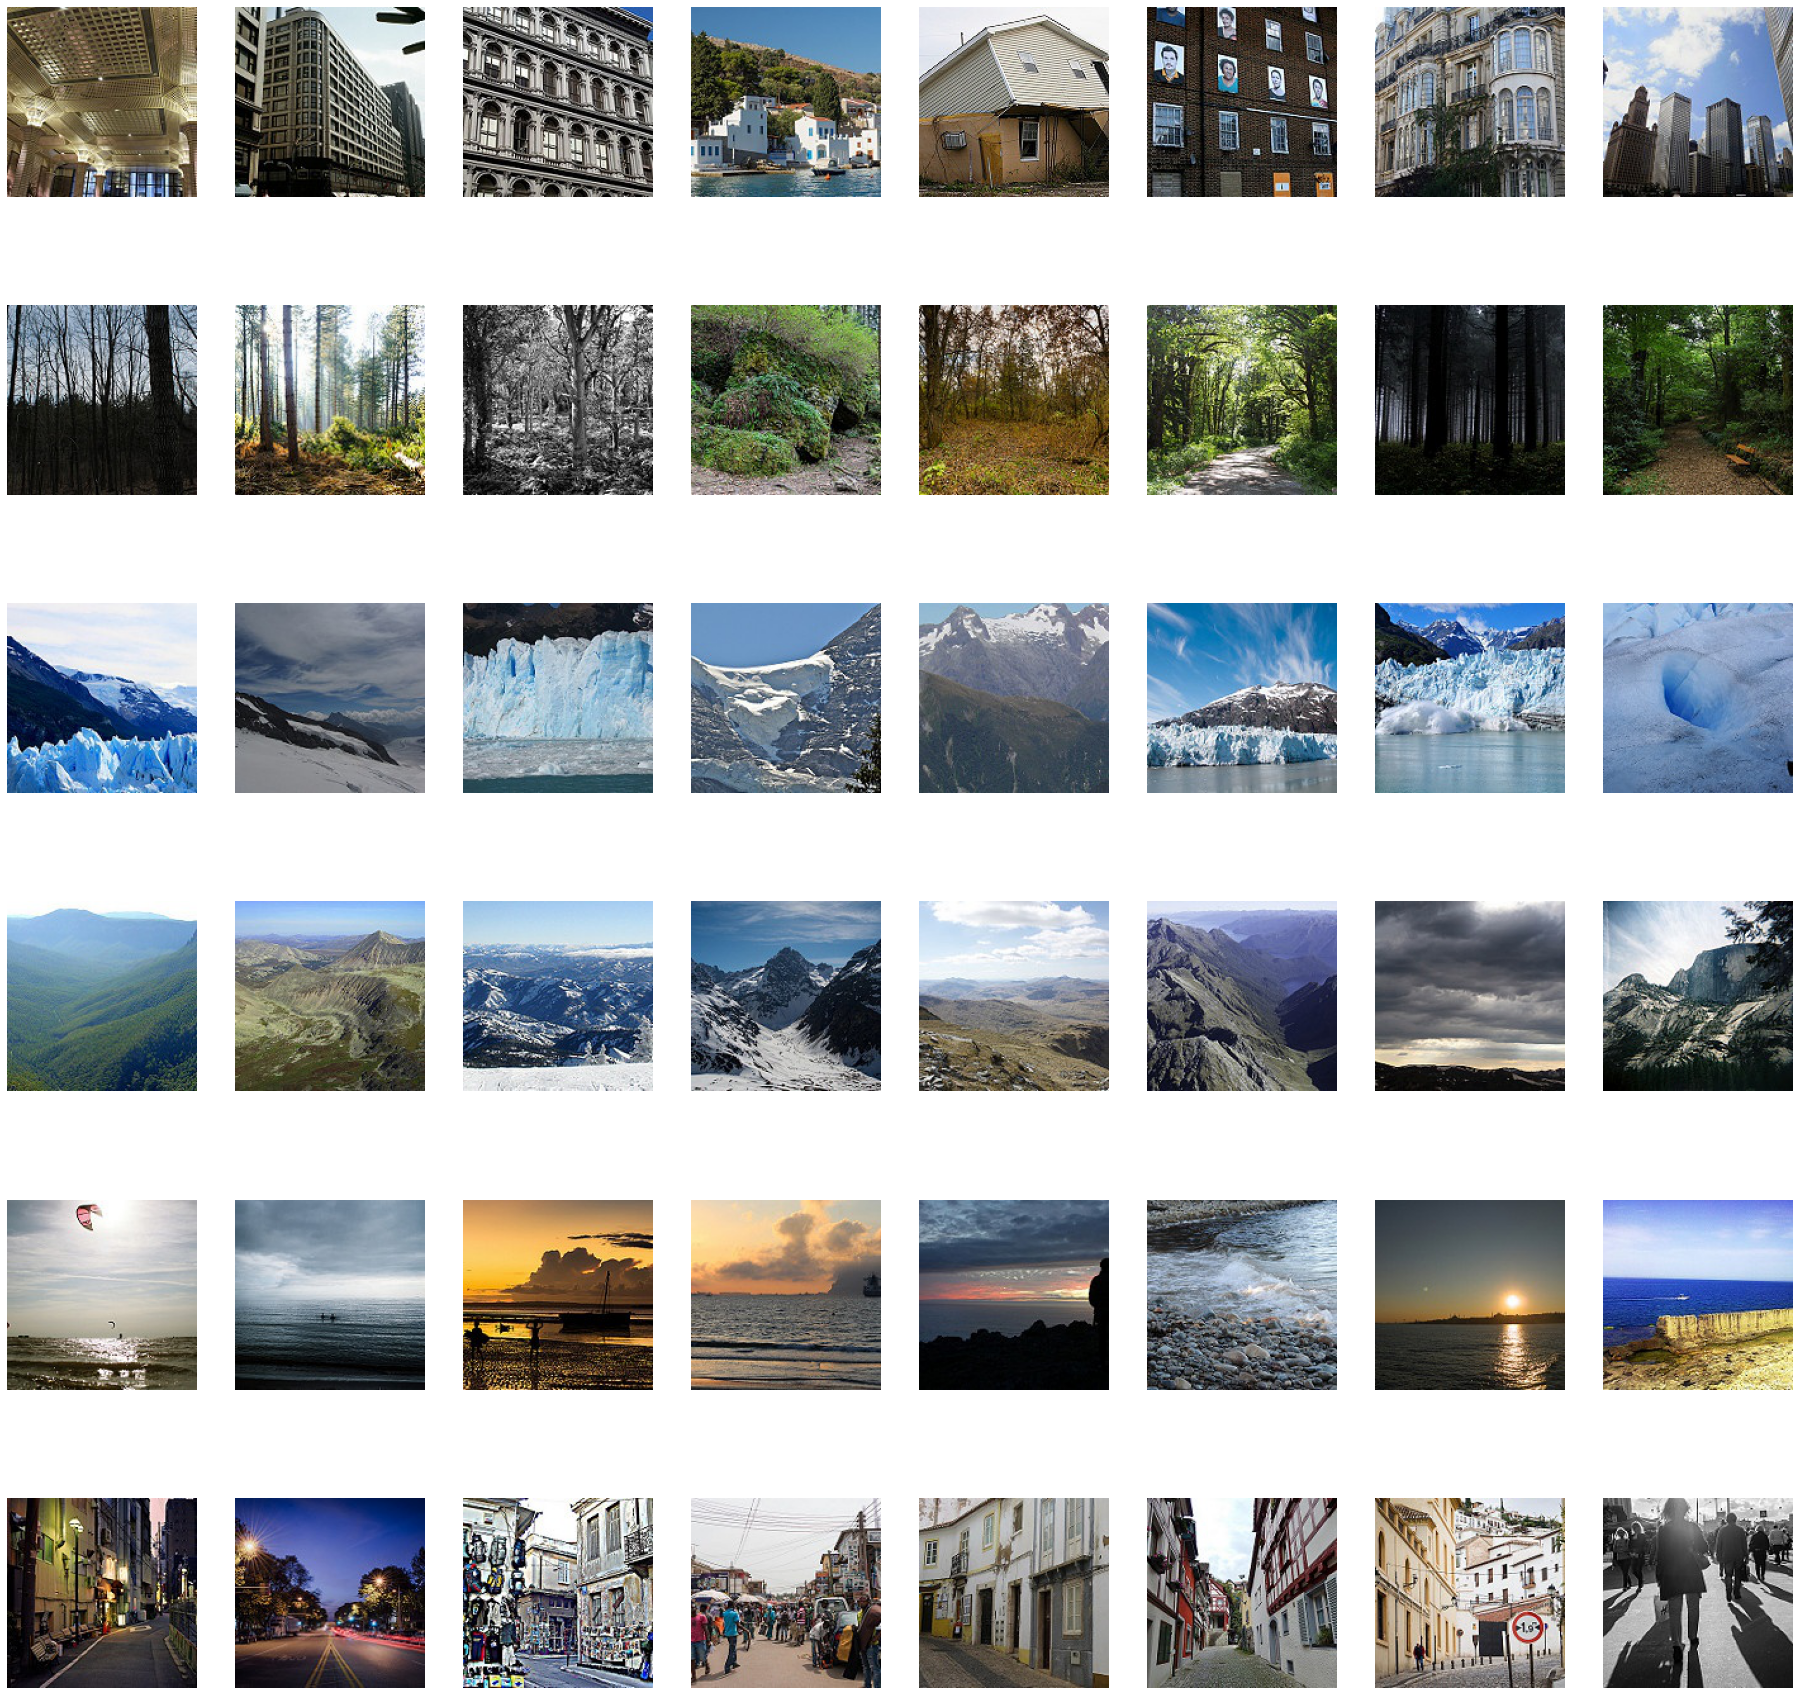

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nrows*8, ncols*8)

pic_index += 8

next_buildings_pix = [os.path.join(train_buildings_dir, fname) for fname in train_buildings_names[pic_index-8:pic_index]]
next_forest_pix = [os.path.join(train_forest_dir, fname) for fname in train_forest_names[pic_index-8:pic_index]]
next_glacier_pix = [os.path.join(train_glacier_dir, fname) for fname in train_glacier_names[pic_index-8:pic_index]]
next_mountain_pix = [os.path.join(train_mountain_dir, fname) for fname in train_mountain_names[pic_index-8:pic_index]]
next_sea_pix = [os.path.join(train_sea_dir, fname) for fname in train_sea_names[pic_index-8:pic_index]]
next_street_pix = [os.path.join(train_street_dir, fname) for fname in train_street_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_buildings_pix + next_forest_pix + next_glacier_pix + next_mountain_pix + next_sea_pix + next_street_pix):
    sp = plt.subplot(nrows+2, ncols+4, i+1)
    sp.axis('off') # avoid showing axis or gridlines

    img = mpimg.imread(img_path)
    plt.imshow(img)

# Build model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy'))>0.98:
            print('Reached 98% accuracy, cancelling training')
            self.model.stop_training = True

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Image Classifier model

In [ ]:
total_training_images = len(train_buildings_names + train_forest_names + train_glacier_names + train_mountain_names + train_sea_names + train_street_names)
total_validation_images = len(os.listdir(validation_buildings_dir) + os.listdir(validation_forest_dir) + os.listdir(validation_glacier_dir) + os.listdir(validation_mountain_dir) + os.listdir(validation_sea_dir) + os.listdir(validation_street_dir))

callbacks = myCallback()
history = model.fit(
                    train_generator,
                    steps_per_epoch=total_training_images/32,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=total_validation_images/32,
                    callbacks = [callbacks]
)

Epoch 1/10
438/438 [==============================] - 371s 843ms/step - loss: 1.4047 - accuracy: 0.4269 - val_loss: 0.9084 - val_accuracy: 0.6590
Epoch 2/10
438/438 [==============================] - 358s 816ms/step - loss: 1.0160 - accuracy: 0.6145 - val_loss: 0.8841 - val_accuracy: 0.6920
Epoch 3/10
438/438 [==============================] - 365s 833ms/step - loss: 0.8951 - accuracy: 0.6736 - val_loss: 0.6796 - val_accuracy: 0.7670
Epoch 4/10
438/438 [==============================] - 371s 846ms/step - loss: 0.8326 - accuracy: 0.6947 - val_loss: 0.7218 - val_accuracy: 0.7547
Epoch 5/10
438/438 [==============================] - 383s 874ms/step - loss: 0.7743 - accuracy: 0.7211 - val_loss: 0.7512 - val_accuracy: 0.7333
Epoch 6/10
438/438 [==============================] - 362s 826ms/step - loss: 0.7314 - accuracy: 0.7381 - val_loss: 0.6777 - val_accuracy: 0.7643
Epoch 7/10
438/438 [==============================] - 361s 822ms/step - loss: 0.7400 - accuracy: 0.7395 - val_loss: 0.5357 -

Use a Training and Validation Accuracy Graph to check for Overfitting

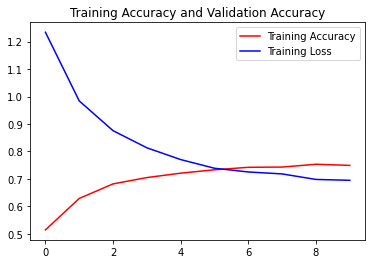

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Test the classifier model on a custom picture

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes)

    for row in classes:
        prediction_list = row.tolist()
        if max(prediction_list) == prediction_list[0]:
            print('The image is a building')
        elif max(prediction_list) == prediction_list[1]:
            print('The image is a forest')
        elif max(prediction_list) == prediction_list[2]:
            print('The image is a glacier')
        elif max(prediction_list) == prediction_list[3]:
            print('The image is a mountain')
        elif max(prediction_list) == prediction_list[4]:
            print('The image is a sea')
        elif max(prediction_list) == prediction_list[5]:
            print('The image is a street')

Saving forest1.jpeg to forest1.jpeg
[[0. 1. 0. 0. 0. 0.]]
The image is a forest


# Build model using Transfer Learning

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
                                input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None
)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print(f'Last layer output shape is: {last_layer.output_shape}')
last_output = last_layer.output

--2021-03-15 10:14:37--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   150MB/s    in 0.6s    

2021-03-15 10:14:37 (150 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Last layer output shape is: (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

tl_model = Model(pre_trained_model.input, x)

tl_model.compile(optimizer=RMSprop(lr=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [20]:
total_training_images = len(train_buildings_names + train_forest_names + train_glacier_names + train_mountain_names + train_sea_names + train_street_names)
total_validation_images = len(os.listdir(validation_buildings_dir) + os.listdir(validation_forest_dir) + os.listdir(validation_glacier_dir) + os.listdir(validation_mountain_dir) + os.listdir(validation_sea_dir) + os.listdir(validation_street_dir))

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy'))>0.98:
            print('Reached 98% accuracy, cancelling training')
            self.model.stop_training = True
callbacks = myCallback()

tl_history = tl_model.fit(
                    train_generator,
                    steps_per_epoch=total_training_images/32,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=total_validation_images/32,
                    callbacks = [callbacks])

Epoch 1/10
438/438 [==============================] - 820s 2s/step - loss: 0.7369 - accuracy: 0.7506 - val_loss: 0.3294 - val_accuracy: 0.8847
Epoch 2/10
438/438 [==============================] - 811s 2s/step - loss: 0.4079 - accuracy: 0.8605 - val_loss: 0.3130 - val_accuracy: 0.8950
Epoch 3/10
438/438 [==============================] - 799s 2s/step - loss: 0.3792 - accuracy: 0.8722 - val_loss: 0.2949 - val_accuracy: 0.9060
Epoch 4/10
438/438 [==============================] - 803s 2s/step - loss: 0.3754 - accuracy: 0.8737 - val_loss: 0.3133 - val_accuracy: 0.9040
Epoch 5/10
438/438 [==============================] - 806s 2s/step - loss: 0.3487 - accuracy: 0.8844 - val_loss: 0.2978 - val_accuracy: 0.9143
Epoch 6/10
438/438 [==============================] - 805s 2s/step - loss: 0.3506 - accuracy: 0.8836 - val_loss: 0.3084 - val_accuracy: 0.9087
Epoch 7/10
438/438 [==============================] - 797s 2s/step - loss: 0.3334 - accuracy: 0.8889 - val_loss: 0.2828 - val_accuracy: 0.9150

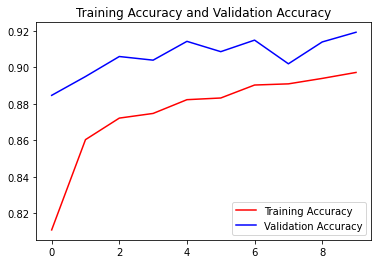

<Figure size 432x288 with 0 Axes>

In [21]:
acc = tl_history.history['accuracy']
val_acc = tl_history.history['val_accuracy']
loss = tl_history.history['loss']
val_loss = tl_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Test the tl_model classifier on a custom picture

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = tl_model.predict(images, batch_size=10)
    print(fn)
    print(classes)

    for row in classes:
        prediction_list = row.tolist()
        if max(prediction_list) == prediction_list[0]:
            print('The image is a building')
        elif max(prediction_list) == prediction_list[1]:
            print('The image is a forest')
        elif max(prediction_list) == prediction_list[2]:
            print('The image is a glacier')
        elif max(prediction_list) == prediction_list[3]:
            print('The image is a mountain')
        elif max(prediction_list) == prediction_list[4]:
            print('The image is a sea')
        elif max(prediction_list) == prediction_list[5]:
            print('The image is a street')

Saving building.jpg to building (1).jpg
building.jpg
[[1. 0. 0. 0. 0. 0.]]
The image is a building
